<a href="https://colab.research.google.com/github/tirals88/DL_for_everyone/blob/main/deeplearning/notebook/15%EC%9E%A5%20%EC%84%A0%ED%98%95%20%ED%9A%8C%EA%B7%80%20%EC%A0%81%EC%9A%A9%ED%95%98%EA%B8%B0%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

'모두의 딥러닝' 책 스터디 내용을 jupyter notebook으로 정리하여 올립니다.

Github 주소 : 'https://github.com/gilbutITbook/080228'

**모두의 딥러닝**

# 15 장 선형 회귀 적용하기

지금까지는 참/거짓 또는 여러 개의 클래스를 예측하는 모델을 보았다.</br>그런 것들과는 달리 이번 장에서는 가격, 성적 등과 같이 수치를 맞히는 모델을 볼 것이다.

In [1]:
# 데이터 확인
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/gilbutITbook/080228/master/deeplearning/dataset/housing.csv', delim_whitespace=True, header=None)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       506 non-null    float64
 1   1       506 non-null    float64
 2   2       506 non-null    float64
 3   3       506 non-null    int64  
 4   4       506 non-null    float64
 5   5       506 non-null    float64
 6   6       506 non-null    float64
 7   7       506 non-null    float64
 8   8       506 non-null    int64  
 9   9       506 non-null    float64
 10  10      506 non-null    float64
 11  11      506 non-null    float64
 12  12      506 non-null    float64
 13  13      506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB
None


In [2]:
print(df.head())

        0     1     2   3      4      5     6       7   8      9     10  \
0  0.00632  18.0  2.31   0  0.538  6.575  65.2  4.0900   1  296.0  15.3   
1  0.02731   0.0  7.07   0  0.469  6.421  78.9  4.9671   2  242.0  17.8   
2  0.02729   0.0  7.07   0  0.469  7.185  61.1  4.9671   2  242.0  17.8   
3  0.03237   0.0  2.18   0  0.458  6.998  45.8  6.0622   3  222.0  18.7   
4  0.06905   0.0  2.18   0  0.458  7.147  54.2  6.0622   3  222.0  18.7   

       11    12    13  
0  396.90  4.98  24.0  
1  396.90  9.14  21.6  
2  392.83  4.03  34.7  
3  394.63  2.94  33.4  
4  396.90  5.33  36.2  


13개의 컬럼들은 집값에 영향을 미칠 수 있는 주변 요인들에 관한 것들이고, 14번째 컬럼은 집값(단위:$1,000)으로 연속적인 수치이다.


선형 회귀 데이터는 마지막에 참과 거짓을 구분할 필요가 없다. 
```
model.add(Dense(1, activation='relu'))
```
이 하나의 활성화 함수가 없어지는 것이다.

In [4]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(30, input_dim=13, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1))

모델의 학습이 어느정도 진행되었는지 확인하기 위해 예측 값과 실제 값을 비교하는 부분을 추가한다.

```
Y_prediction = model.predict(X_test).flatten()
for i in range(10):
  label = Y_test[i]
  prediction = Y_prediction[i]
  print("실제가격: {:.3f}, 예상가격: {:.3f}".format(label, prediction))
```


In [ ]:
# 전체 코드드
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

#seed 값 설정
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

dataset = df.values
X = dataset[:, :13]
Y = dataset[:, 13]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, 
                                                    random_state = seed)

#모델 설정
model = Sequential()
model.add(Dense(30, input_dim = 13, activation='relu'))
model.add(Dense(6, activation='relu'))
model.add(Dense(1))

#모델 컴파일
model.compile(loss='mean_squared_error',
              optimizer='adam')
#모델 실행
model.fit(X_train, Y_train, epochs=200, batch_size=10)

#예측 값과 실제 값의 비교
Y_prediction = model.predict(X_test).flatten()
for i in range(10):
  label = Y_test[i]
  prediction = Y_prediction[i]
  print("실제가격: {:.3f}, 예상가격: {:.3f}".format(label, prediction))

```
실제가격: 22.600, 예상가격: 24.050
실제가격: 50.000, 예상가격: 26.878
실제가격: 23.000, 예상가격: 23.615
실제가격: 8.300, 예상가격: 11.005
실제가격: 21.200, 예상가격: 18.191
실제가격: 19.900, 예상가격: 19.162
실제가격: 20.600, 예상가격: 15.584
실제가격: 18.700, 예상가격: 21.765
실제가격: 16.100, 예상가격: 18.604
실제가격: 18.600, 예상가격: 11.355
```

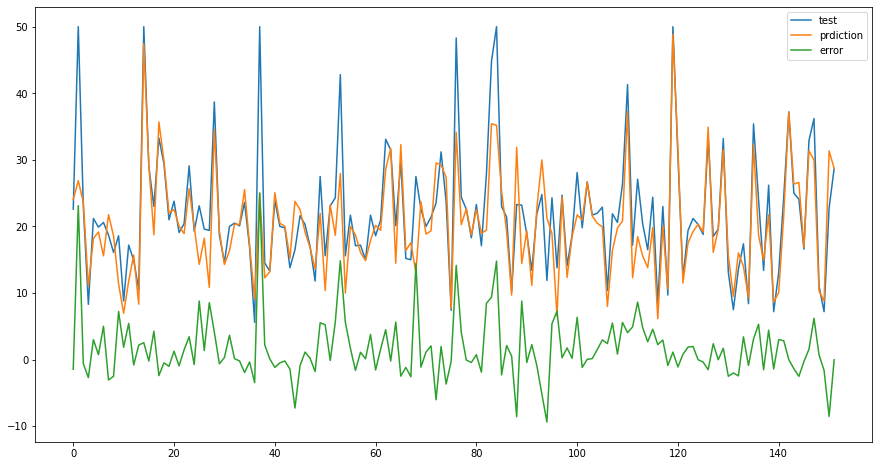

In [21]:
import matplotlib.pyplot as plt

xx = np.arange(len(Y_test))
plt.figure(figsize=(15, 8))
plt.plot(xx, Y_test, label='test')
plt.plot(xx, Y_prediction, label='prdiction')
plt.plot(xx, Y_test-Y_prediction, label='error')
plt.legend()
plt.show()

In [ ]:
#epoch 을 올려보았다.

model2 = Sequential()
model2.add(Dense(30, input_dim = 13, activation='relu'))
model2.add(Dense(6, activation='relu'))
model2.add(Dense(1))

#모델 컴파일
model2.compile(loss='mean_squared_error',
              optimizer='adam')
#모델 실행
model2.fit(X_train, Y_train, epochs=300, batch_size=10)

#예측 값과 실제 값의 비교
Y_prediction2 = model2.predict(X_test).flatten()
for i in range(10):
  label = Y_test[i]
  prediction = Y_prediction2[i]
  print("실제가격: {:.3f}, 예상가격: {:.3f}".format(label, prediction))

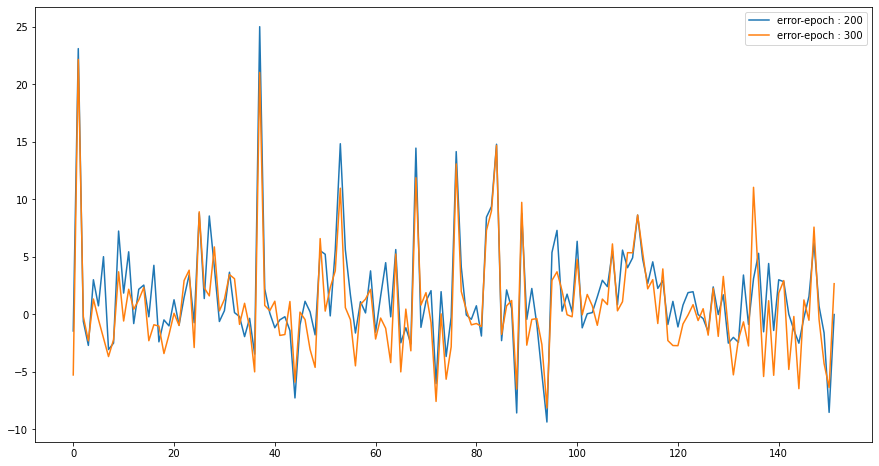

In [25]:
plt.figure(figsize=(15, 8))
plt.plot(xx, Y_test-Y_prediction, label='error-epoch : 200')
plt.plot(xx, Y_test-Y_prediction2, label='error-epoch : 300')
plt.legend()
plt.show()

epoch을 올리는 정도로는 오차 개선에 큰 효과가 없었고 오히려 오차가 커지는 경우를 볼 수 있다.